# Metodo dei Minimi Quadrati applicato ai dati di Centa San Nicolò

Matteo Franzoi - Andrea Rebellato - 2019-03-27

---

Primo passo è importare le librerie

In [1]:
import os
from pandas import *
import pandas as pd
from numpy import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
os.getcwd()

'/media/data/jupyter/esercitazione'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '.~lock.massimePrecipitazioniCenta_02.csv#',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'best_parameters',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 'abs_ls',  
 'abs_m',  
 'abs_mle',  
 'best_parameters',  
 'lsCenta.ipynb',  
 'lsppCenta.ipynb',  
 '**massimePrecipitazioniCenta.csv**',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb',  
 'pearsonCenta.ipynb']

e importare il ffile _csv_ dei dati

In [4]:
pd.set_option('display.max_rows', 20)
data = read_csv('massimePrecipitazioniCenta.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,15min,30min,45min,1h,3h,6h,12h,24h
anno,,,,,,,,
1934,NaN,NaN,NaN,22.6,42.0,56.6,58.8,85.0
1935,NaN,NaN,NaN,17.8,32.6,54.2,63.6,88.0
1936,NaN,NaN,NaN,15.8,28.0,41.4,72.0,85.2
1937,NaN,NaN,NaN,27.8,35.6,38.2,58.4,62.6
1938,NaN,NaN,NaN,15.0,21.4,32.0,56.0,83.0
1939,NaN,NaN,NaN,29.4,36.2,61.0,115.2,117.8
1940,NaN,NaN,NaN,28.8,67.0,94.0,119.0,135.2
1941,NaN,NaN,NaN,14.2,21.0,25.6,44.0,51.0
1942,NaN,NaN,NaN,27.0,42.0,66.2,82.6,85.6


Si definisce la seguente funzione, dove:  
* __t__ è la variabile indipendente;
* __x__ è il vettore dei parametri _a_ e *b*:
$$ x[0] = a, \quad x[1] = b$$

In [5]:
def fun(x, t, y):
    return np.exp(-np.exp(-(t - x[0])/x[1])) - y

Per applicare il metodo dei minimi quadrati è necessario importare l'omonima funzione da _scipy_

In [6]:
from scipy.optimize import least_squares

Per ogni valore di durata si deve definire un vettore $x_0$ di valori iniziali di _a_ e *b*.  
Per 15min

In [16]:
x0 = [11, 4]
ecdf15min = ECDF(data['15min'])
t_train = sorted(data['15min'].dropna())
y_train = ecdf15min(t_train)

dove __t_train__ ordina i dati relativi alla durata, eliminando i dati NaN e **y_train** da in pasto i dati _ordinati_ alla empirical cumulative distribution function relativa alla durata scelta.  
Si può quindi applicare la funzione dei minimi quadrati

In [17]:
res_lsq_15min = least_squares(fun, x0, args = (t_train, y_train))

che prende come input la funzione da minimizzare (definita poc'anzi), il vettore dei valori iniziali e gli argomenti che vanno dati in pasto alla funzione __fun__. In particolare, la funzione __fun__ ha come input
$$ fun(x, args,\dots) $$

I valori per la durata di 15min sono

In [18]:
res_lsq_15min.x

array([16.40585127, 12.09546225])

Il medesimo procedimento deve essere fatto per ogni durate.  
Per 30min

In [19]:
x0 = [15, 5]
ecdf30min = ECDF(data['30min'])
t_train = sorted(data['30min'].dropna())
y_train = ecdf30min(t_train)
res_lsq_30min = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_30min.x

array([18.59565522, 11.8255275 ])

Per 45min

In [20]:
x0 = [17, 6]
ecdf45min = ECDF(data['45min'])
t_train = sorted(data['45min'].dropna())
y_train = ecdf45min(t_train)
res_lsq_45min = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_45min.x

array([24.78487459, 18.05307822])

Per 1h

In [21]:
x0 = [20, 6]
ecdf1h = ECDF(data['1h'])
t_train = sorted(data['1h'].dropna())
y_train = ecdf1h(t_train)
res_lsq_1h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_1h.x

array([19.44805869,  6.83870983])

Per 3h

In [22]:
x0 = [30, 10]
ecdf3h = ECDF(data['3h'])
t_train = sorted(data['3h'].dropna())
y_train = ecdf3h(t_train)
res_lsq_3h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_3h.x

array([29.19866157,  9.41624222])

Per 6h

In [23]:
x0 = [40, 12]
ecdf6h = ECDF(data['6h'])
t_train = sorted(data['6h'].dropna())
y_train = ecdf6h(t_train)
res_lsq_6h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_6h.x

array([40.25106396, 13.17942413])

Per 12h

In [24]:
x0 = [57, 20]
ecdf12h = ECDF(data['12h'])
t_train = sorted(data['12h'].dropna())
y_train = ecdf12h(t_train)
res_lsq_12h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_12h.x

array([56.00373317, 17.79886563])

Per 24h

In [25]:
x0 = [76, 25]
ecdf24h = ECDF(data['24h'])
t_train = sorted(data['24h'].dropna())
y_train = ecdf24h(t_train)
res_lsq_24h = least_squares(fun, x0, args = (t_train, y_train))
res_lsq_24h.x

array([74.32422653, 23.5469465 ])

È utile costruire un DataFrame contentente tutti i valori

In [26]:
abs_ls = pd.DataFrame([
    res_lsq_15min.x,
    res_lsq_30min.x,
    res_lsq_45min.x,
    res_lsq_1h.x,
    res_lsq_3h.x,
    res_lsq_6h.x,
    res_lsq_12h.x,
    res_lsq_24h.x
]).T
#------------------------indice-----------------------
abs_ls.index = ['a', 'b']
#------------------------colonne----------------------
abs_ls.columns = ['15min', '30min', '45min', '1h', '3h', '6h', '12h', '24h']
#-----------------------------------------------------
abs_ls

,15min,30min,45min,1h,3h,6h,12h,24h
a,16.405851,18.595655,24.784875,19.448059,29.198662,40.251064,56.003733,74.324227
b,12.095462,11.825527,18.053078,6.838710,9.416242,13.179424,17.798866,23.546947


che va salvato in un file

In [27]:
abs_ls.to_pickle('abs_ls')

In [28]:
os.listdir()

['.ipynb_checkpoints',
 '.~lock.massimePrecipitazioniCenta_02.csv#',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'best_parameters',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 '**abs_ls**  
 'abs_m',  
 'abs_mle',  
 'lsCenta.ipynb',  
 'massimePrecipitazioniCenta.csv',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb']

Definita la funzione di Gumbel

In [29]:
def gumbel(x, abs_d, col):
    return np.exp(-np.exp(-(x - abs_d[col]['a'])/abs_d[col]['b']))

e definito il vettore che va dal minimo dei dati al massimo dei dati

In [30]:
t_rain = np.linspace(data.min()['15min'], data.max()['24h'], 100)

dove

In [31]:
print ('minimo = ', data.min()['15min'])
print ('massimo =', data.max()['24h'])

minimo =  5.2
massimo = 192.0


Si definisce il DataFrame che contiene i valori che escono dalla funzione di Gumbel divisi per durata e per precipitazione

In [33]:
teta = []
for h in data.columns:
        teta = teta + [gumbel(t_rain, abs_ls, h)]
        
gb = pd.DataFrame(teta, index = ['15min', '30min', '45min', '1h', '3h', '6h', '12h', '24h'], columns = t_rain
).T #Trasposta

#------------------------------------------
gb

,15min,30min,45min,1h,3h,6h,12h,24h
5.200000,0.080016,0.044858,0.051871,0.000325,0.000003,6.224760e-07,2.880549e-08,6.623461e-09
7.086869,0.115239,0.070903,0.069576,0.002253,0.000028,4.187288e-06,1.651727e-07,2.824281e-08
8.973737,0.157450,0.104754,0.090643,0.009797,0.000190,2.184341e-05,7.945317e-07,1.077038e-07
10.860606,0.205639,0.146108,0.115029,0.029887,0.000902,9.141441e-05,3.263382e-06,3.705005e-07
12.747475,0.258417,0.194030,0.142566,0.069674,0.003221,3.160678e-04,1.162814e-05,1.158854e-06
14.634343,0.314199,0.247112,0.172971,0.132443,0.009131,9.261455e-04,3.646240e-05,3.319954e-06
16.521212,0.371388,0.303690,0.205872,0.215637,0.021422,2.351245e-03,1.019193e-04,8.770737e-06
18.408081,0.428511,0.362044,0.240833,0.312158,0.043048,5.271619e-03,2.569009e-04,2.150062e-05
20.294949,0.484307,0.420568,0.277380,0.413324,0.076209,1.061248e-02,5.900503e-04,4.919023e-05
22.181818,0.537776,0.477873,0.315025,0.511458,0.121623,1.946058e-02,1.246490e-03,1.055914e-04


Si procede quindi al plot dei delle curve di distribuzione di probabilità pluviometrica

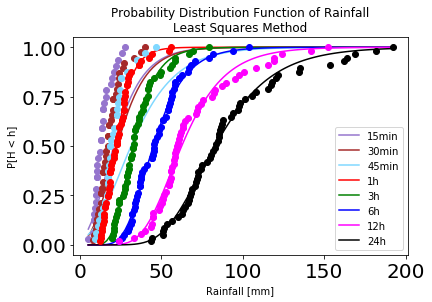

In [34]:
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)

#----------------plot---------------

ax = gb.plot(color = ['#9575cd', 'brown', '#80d8ff','red', 'green', 'blue', 'magenta', 'black'])
#plt.figure(figsize = (18 ,16), dpi = 100)

#--------------15min--------------------
data15min = data['15min'].dropna()
ecdf15min = ECDF(data15min)
ax.plot(data15min, ecdf15min(data15min), 'o', c = '#9575cd')

#--------------30min--------------------
data30min = data['30min'].dropna()
ecdf30min = ECDF(data30min)
ax.plot(data30min, ecdf30min(data30min), 'o', c = 'brown')

#--------------45min--------------------
data45min = data['45min'].dropna()
ecdf45min = ECDF(data45min)
ax.plot(data45min, ecdf45min(data45min), 'o', c = '#80d8ff')

#--------------1h--------------------
data1h = data['1h'].dropna()
ecdf1h = ECDF(data1h)
ax.plot(data1h, ecdf1h(data1h), 'o', c = 'red')

#--------------3h--------------------
data3h = data['3h'].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h, ecdf3h(data3h), 'o', c = 'green')

#--------------6h--------------------
data6h = data['6h'].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h, ecdf6h(data6h), 'o', c = 'blue')

#--------------12h-------------------
data12h = data['12h'].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h, ecdf12h(data12h), 'o', c = 'magenta')

#--------------24h-------------------
data24h = data['24h'].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h, ecdf24h(data24h), 'o', c = 'black')

#-----------------label--------------
ax.set_title('Probability Distribution Function of Rainfall\nLeast Squares Method')
ax.set_xlabel('Rainfall [mm]')
ax.set_ylabel('P[H < h]')

#------------------------------------
plt.show()

**dropna()** separa ed elimina i dati NaN.